In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('trucking_vs_econ.csv')
df.columns

Index(['Unnamed: 0', 'TRUCK_D11', 'VMT', 'VMT_D11', 'TSI_Freight',
       'TSI_Freight_C', 'IND_PRO', 'MANUF', 'INV_TO_SALES', 'IDX_TRUCK_D11',
       'PETROLEUM', 'IDX_PETROLEUM_D11', 'NATURAL_GAS', 'IDX_RAIL_PM',
       'IDX_WATERBORNE_D11', 'date_time', 'quarter', 'GDP', 'GDP_GROUP'],
      dtype='object')

In [37]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           296 non-null    int64         
 1   TRUCK_D11            296 non-null    float64       
 2   VMT                  296 non-null    float64       
 3   VMT_D11              296 non-null    float64       
 4   TSI_Freight          296 non-null    float64       
 5   TSI_Freight_C        296 non-null    float64       
 6   IND_PRO              296 non-null    float64       
 7   MANUF                296 non-null    float64       
 8   INV_TO_SALES         296 non-null    float64       
 9   IDX_TRUCK_D11        296 non-null    float64       
 10  PETROLEUM            296 non-null    float64       
 11  IDX_PETROLEUM_D11    296 non-null    float64       
 12  NATURAL_GAS          296 non-null    float64       
 13  IDX_RAIL_PM          296 non-null  

## Feature Engineering

In [31]:
df['TRUCK_D11_GDP_ratio'] = df['TRUCK_D11'] / df['GDP']


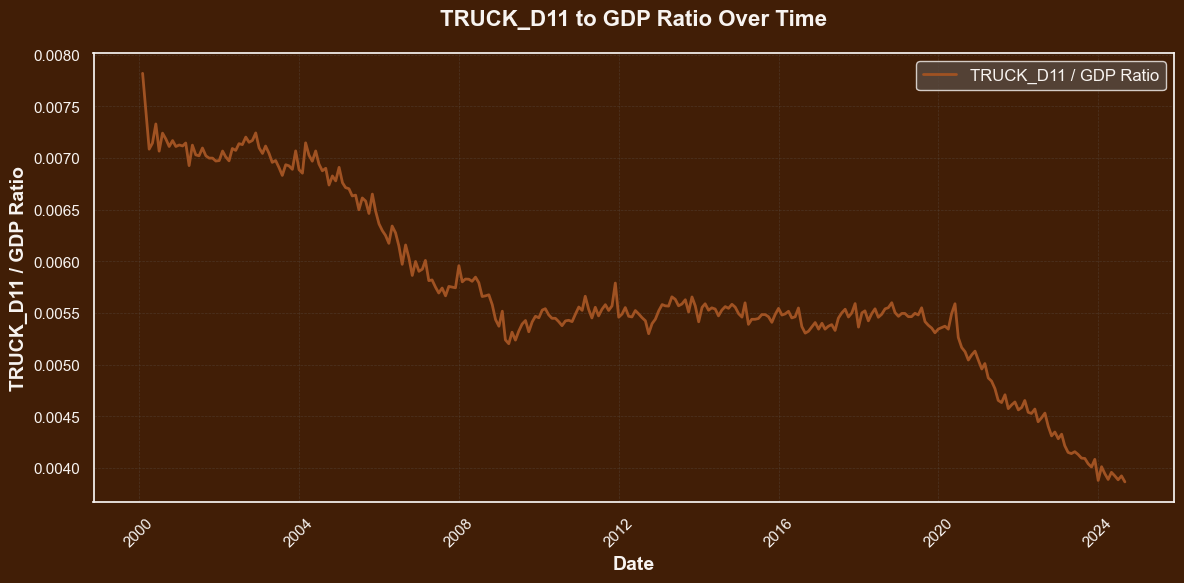

In [39]:
# Set style with custom background
sns.set(style="whitegrid", rc={"axes.facecolor": "#411E06",  # Dark brown background
                               "grid.color": "#584A41",      # Taupe grid
                               "text.color": "#F8F4F1",      # Off-white text
                               "axes.labelcolor": "#F8F4F1", # Off-white labels
                               "xtick.color": "#F8F4F1",     # Off-white x-ticks
                               "ytick.color": "#F8F4F1"})    # Off-white y-ticks

# Create the plot
plt.figure(figsize=(12, 6), facecolor='#411E06')  # Dark brown base
ax = plt.gca()

# Plot the ratio with Terracotta color
plt.plot(df['date_time'], df['TRUCK_D11_GDP_ratio'], 
         color='#A05222',  # Terracotta
         linewidth=2, 
         label='TRUCK_D11 / GDP Ratio')

# Add labels and title
plt.title('TRUCK_D11 to GDP Ratio Over Time', 
          fontsize=16, 
          color='#F8F4F1',  # Off-white title
          weight='bold', 
          pad=20)
plt.xlabel('Date', fontsize=14, color='#F8F4F1', weight='bold')
plt.ylabel('TRUCK_D11 / GDP Ratio', fontsize=14, color='#F8F4F1', weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='#F8F4F1')

# Customize grid
ax.grid(color='#584A41',  # Taupe grid
        linestyle='--', 
        linewidth=0.5, 
        alpha=0.5)

# Add a legend with custom styling
legend = plt.legend(facecolor='#584A41',  # Taupe background
                    edgecolor='#F8F4F1',  # Off-white border
                    fontsize=12)
for text in legend.get_texts():
    text.set_color('#F8F4F1')  # Off-white legend text

# Customize spine colors
for spine in ax.spines.values():
    spine.set_color('#F8F4F1')  # Off-white borders

# Tight layout with background preservation
plt.tight_layout()
plt.savefig('truck_gdp_ratio.png', dpi=300, bbox_inches='tight', facecolor='#411E06')
plt.show()

In [4]:
X = df.drop(['Unnamed: 0', 'date_time', 'quarter', 'GDP_GROUP'], axis=1)
y = df['GDP']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236, 15), (60, 15), (236,), (60,))

In [6]:
X_train.corr()

,TRUCK_D11,VMT,VMT_D11,TSI_Freight,TSI_Freight_C,IND_PRO,MANUF,INV_TO_SALES,IDX_TRUCK_D11,PETROLEUM,IDX_PETROLEUM_D11,NATURAL_GAS,IDX_RAIL_PM,IDX_WATERBORNE_D11,GDP
TRUCK_D11,1.000000,0.477135,0.712742,0.991991,0.014146,0.729544,0.805995,-0.639799,0.999998,0.859052,0.872219,0.586453,-0.150162,-0.148075,0.928107
VMT,0.477135,1.000000,0.648887,0.498840,0.120337,0.490861,0.475871,-0.344059,0.476965,0.535475,0.453446,-0.152127,0.176895,0.042047,0.478125
VMT_D11,0.712742,0.648887,1.000000,0.740505,0.174561,0.749588,0.720489,-0.491917,0.712683,0.653812,0.664546,0.420811,0.323864,0.054715,0.719503
TSI_Freight,0.991991,0.498840,0.740505,1.000000,0.022426,0.777284,0.826278,-0.641413,0.991988,0.865592,0.878048,0.578388,-0.128252,-0.082610,0.924797
TSI_Freight_C,0.014146,0.120337,0.174561,0.022426,1.000000,0.017760,0.006573,-0.116306,0.014128,-0.035113,-0.036761,-0.027857,0.104311,0.149444,-0.022319
IND_PRO,0.729544,0.490861,0.749588,0.777284,0.017760,1.000000,0.832981,-0.417591,0.729585,0.556503,0.560537,0.415889,0.244535,0.154816,0.675709
MANUF,0.805995,0.475871,0.720489,0.826278,0.006573,0.832981,1.000000,-0.742052,0.806001,0.628419,0.637230,0.506459,0.168979,-0.013377,0.896567
INV_TO_SALES,-0.639799,-0.344059,-0.491917,-0.641413,-0.116306,-0.417591,-0.742052,1.000000,-0.639739,-0.493942,-0.499615,-0.398549,0.238310,0.274152,-0.757323
IDX_TRUCK_D11,0.999998,0.476965,0.712683,0.991988,0.014128,0.729585,0.806001,-0.639739,1.000000,0.859022,0.872194,0.586614,-0.150076,-0.147883,0.928106
PETROLEUM,0.859052,0.535475,0.653812,0.865592,-0.035113,0.556503,0.628419,-0.493942,0.859022,1.000000,0.985298,0.504529,-0.200117,-0.083161,0.841980


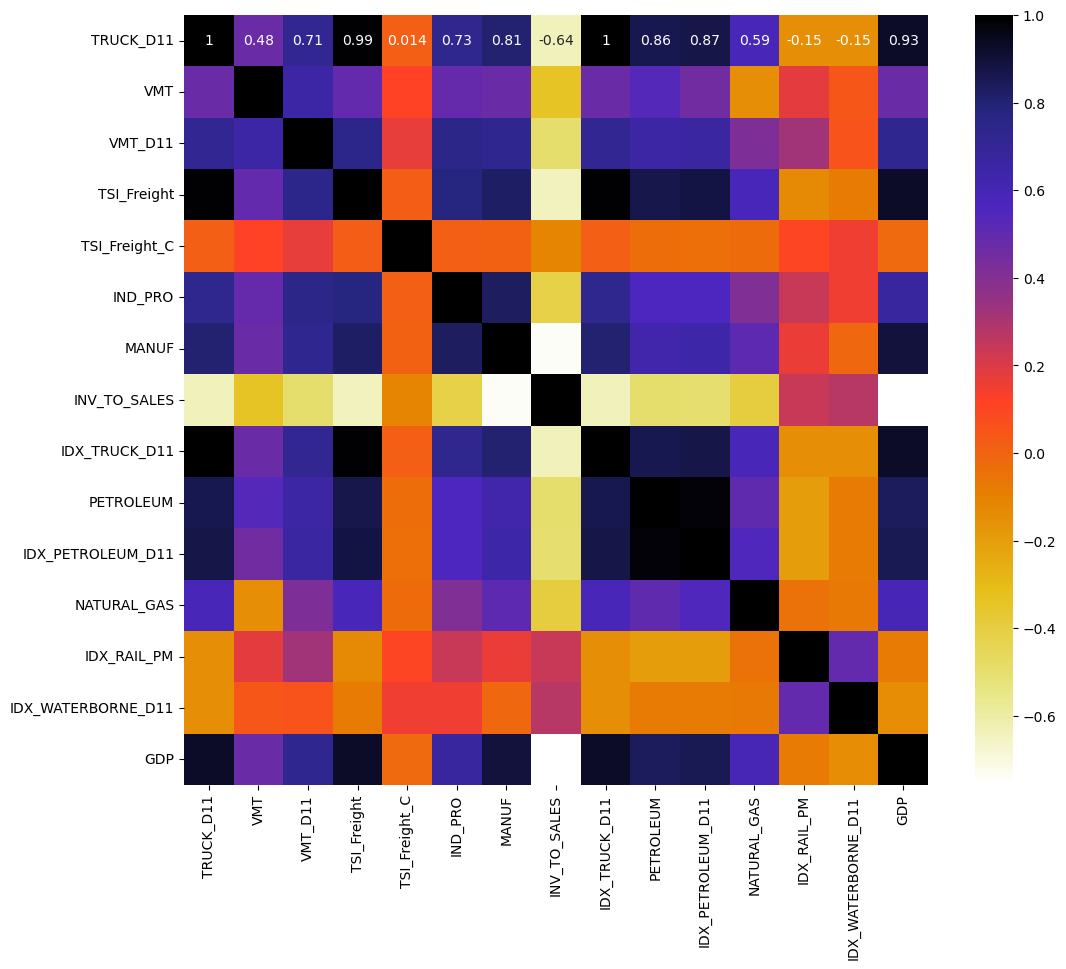

In [7]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features = correlation(X_train, 0.70)
corr_features

{'GDP',
 'IDX_PETROLEUM_D11',
 'IDX_TRUCK_D11',
 'IND_PRO',
 'INV_TO_SALES',
 'MANUF',
 'PETROLEUM',
 'TSI_Freight',
 'VMT_D11'}

In [10]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((236, 6), (60, 6))

In [11]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [12]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## Modeling 

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print('Linear Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Linear Regression
R2 Score Value 0.8430
MAE value: 1652.644372


### Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print('Lasso Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Lasso Regression
R2 Score Value 0.8431
MAE value: 1652.771122


### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print('Ridge Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Regression
R2 Score Value 0.8437
MAE value: 1647.607853


### Support Vector Regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print('Lasso Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Lasso Regression
R2 Score Value 0.8431
MAE value: 1652.771122


### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = MAE(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Random Forrest Regressor
R2 Score Value 0.9689
MAE value: 602.216705


### K Neighbors Regressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = MAE(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print('K-Neighbors Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


K-Neighbors Regressor
R2 Score Value 0.9374
MAE value: 832.298410


## Tuning

### Tuned Random Forest

In [18]:
param_grid = [{'bootstrap': [True, False], 
               'max_depth':[10,20,30,40,50,60,70,80,90, 100, 110, 120], 
               'min_samples_leaf':[1,3,4], 
               'min_samples_split':[2,6,10], 'n_estimators':[5,20,50,100]}]
f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg, param_grid, cv=10, verbose=2, n_jobs=-1)
Random_rf.fit(X_train_scaled, y_train)
best_random_grid = Random_rf.best_estimator_
bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)
print('Random Forest Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Random Forest Tuned
R2 Score Value 0.9705
MAE value: 605.694350


### Tuned Ridge Regression

In [21]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore')
ridge_params = [{'alpha': (np.logspace(-11,11,100)),
                 'solver':['auto', 'svd', 'cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}]
ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs=-1)
random_ridge.fit(X_train_scaled, y_train)
best_ridge = random_ridge.best_estimator_
rbest_pred = best_ridge.predict(X_test_scaled)
mae = MAE(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)

print('Ridge Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Tuned
R2 Score Value 0.8439
MAE value: 1646.260712


Text(0, 0.5, 'Features')

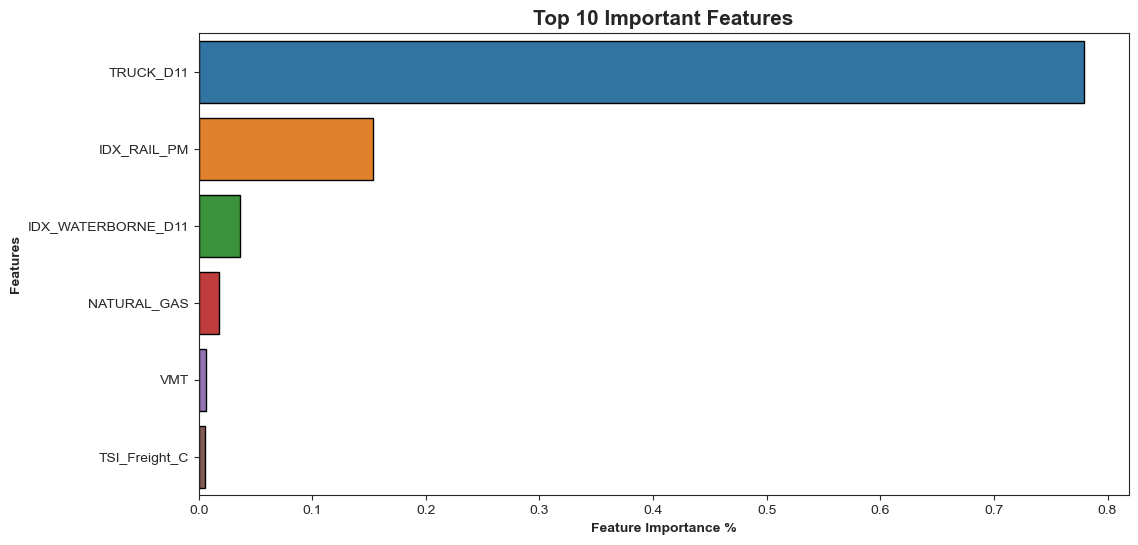

In [22]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':feature_importances}).sort_values('importance', ascending=False)
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature', ec='black')
ax.set_title('Top 10 Important Features', weight='bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight='bold')
ax.set_ylabel('Features', weight='bold')

In [23]:
Xtrain_new = X_train.drop(['TSI_Freight_C', 'VMT', 'NATURAL_GAS'], axis=1)
Xtest_new = X_test.drop(['TSI_Freight_C','VMT', 'NATURAL_GAS'], axis=1)

In [24]:
Xtrain_new.columns

Index(['TRUCK_D11', 'IDX_RAIL_PM', 'IDX_WATERBORNE_D11'], dtype='object')

In [26]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [27]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

print('Random Forest Tuned + Refined Data')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forest Tuned + Refined Data
R2 Score Value 0.9609
MAE value: 652.252252


In [28]:
rf1 = RandomForestRegressor()
rf1.fit(Xtrain_new_scaled, y_train)
rf1_pred = rf1.predict(Xtest_new_scaled)
mae = MAE(y_test, rf1_pred)
r2 = r2_score(y_test, rf1_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Random Forrest Regressor
R2 Score Value 0.9717
MAE value: 545.494396


## Summary

Generated a Random Forest Regressor with an R2 score of 97.8% and an MAE value of 545.49 (different scaling)